**Nicholas Wong, UNI: nzw2002**

## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [86]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [17]:
df[['TV','radio']].head()

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

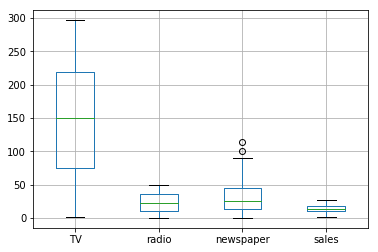

In [5]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply

*[Student edit: Simply what? Question seems incomplete.]*

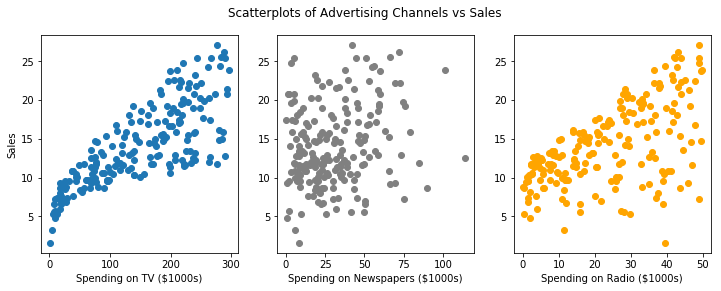

In [43]:
#plt.scatter()

fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot(131)
ax1.scatter(x=df['TV'], y= df['sales'], label='TV')
ax1.set_xlabel("Spending on TV ($1000s)")
ax1.set_ylabel("Sales")

ax2 = plt.subplot(132)
ax2.scatter(x=df['newspaper'], y= df['sales'], c = 'gray', label = 'newspaper')
ax2.set_xlabel("Spending on Newspapers ($1000s)")

ax3 = plt.subplot(133)
ax3.scatter(x=df['radio'], y= df['sales'], c = 'orange', label = 'radio')
ax3.set_xlabel("Spending on Radio ($1000s)")

plt.suptitle("Scatterplots of Advertising Channels vs Sales")
plt.show()

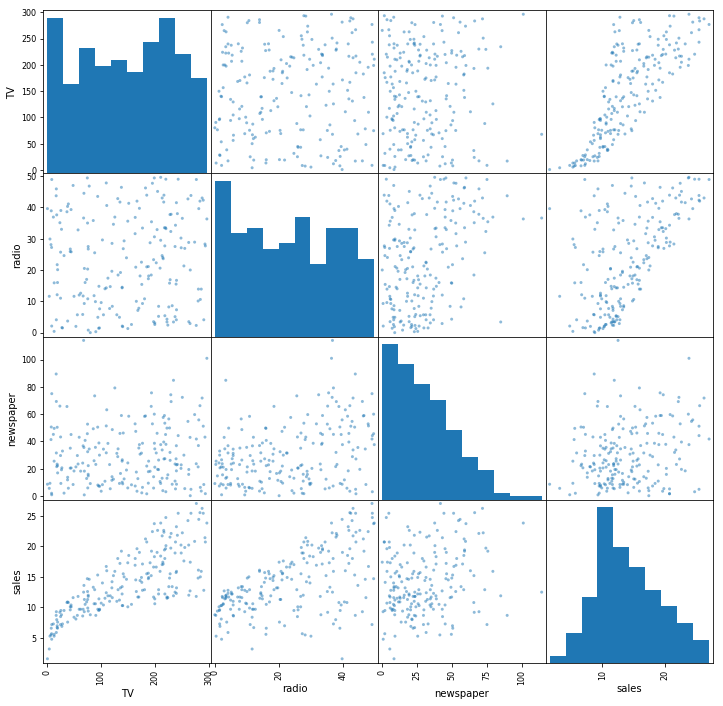

In [42]:
from pandas.plotting import scatter_matrix #pandas.tools is deprecated - please update code 
scatter_matrix(df, figsize = [12, 12])
plt.show()

**Which of the variables seem correlated with one another? Which don't? Explain your answer.**

The most correlated variables are (TV, sales) and (radio, sales). Both of their scatterplots seem to exhibit a general linear trend. 

In [44]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


We see from the correlation coefficients in the table above that TV is highly positively correlated with sales (r = 0.782) and radio is moderately positively correlated with sales (r = 0.576).

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [45]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [87]:
y = df['sales']

b) Set X to be just the features described above in df

In [88]:
X = df.iloc[:,:-1]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

d) Train model on training data, and make predictions on testing data

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Coefficients: \n', model.coef_)
predictions = model.predict(X_test)
print('Predictions: {}'.format(predictions))

Coefficients: 
 [0.04472952 0.18919505 0.00276111]
Predictions: [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [99]:
print('R^2: {}'.format(round(model.score(X_test, y_test), 3)))

R^2: 0.899


The R^2 value is 0.899 which means that 89.9% of the variance can be explained by the linear regression model. This is generally considered a good R^2 value.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

Text(0,0.5,'Predictions')

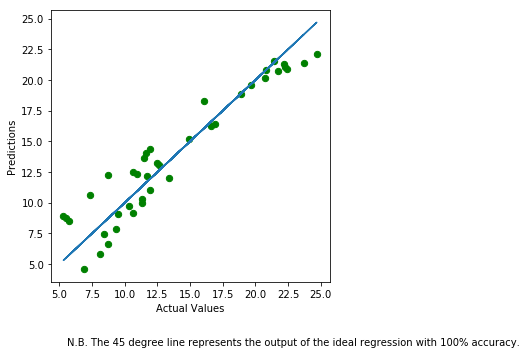

In [74]:
fig, ax = plt.subplots(figsize=(5,5))
txt="N.B. The 45 degree line represents the output of the ideal regression with 100% accuracy."
fig.text(.8, -0.05, txt, ha='center')
ax.scatter(y_test, predictions, s = y_test.shape[0], c = 'g',)
ax.plot(y_test, y_test)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predictions")

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [76]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

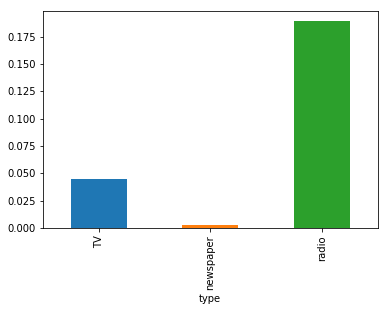

In [103]:
model.coef_
df = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':model.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

From the coefficients above we can see that radio spending seems to have the greatest magnitude, which gives us a prima facie reason to believe that it is the most important feature.

However, we should have scale the features before making any further conclusions, since the features seem to have very different values as seen below:

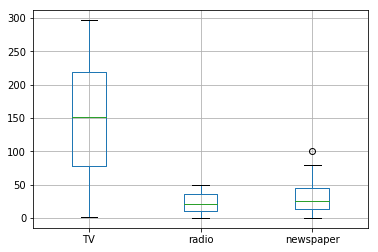

In [78]:
X_train.boxplot()
plt.show()

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

We should standardize the coefficients using the preprocessing library from sklearn.

In [93]:
from sklearn import preprocessing

# Use standard scaler
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model_scaled = LinearRegression()
model_scaled.fit(X_train2, y_train2)
print('Coefficients: \n', model_scaled.coef_)

Coefficients: 
 [3.83060599 2.80191171 0.05998274]


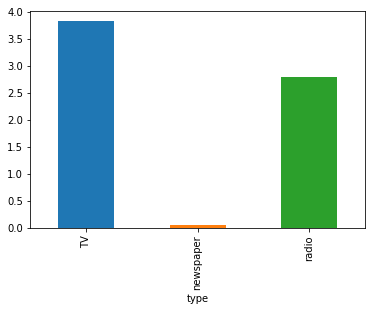

In [101]:
model_scaled.coef_
df = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':model_scaled.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

In the scaled model we can see that coefficient for TV now has the greatest magnitude.

## How could you have improved performance?

**K-Nearest Neighbors Regression**

I will first try implementing a non-parametric regression method known as k-nearest neighbors, which predicts output values given a vector of inputs by taking an average of the *k* closest neighbors using a Minkowski metric set to p = 2 (aka the Euclidean distance).

In [115]:
# KNN Regression

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train2, y_train2)
print('R^2:', round(knn.score(X_test2, y_test2),3))

R^2: 0.937


As we can see the R^2 for k-nearest neighbors regression with k = 2 is **0.937**, which already outperforms the basic linear regression model.

**Inferring New Variable from Hyperplane**

In [147]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'Sales')

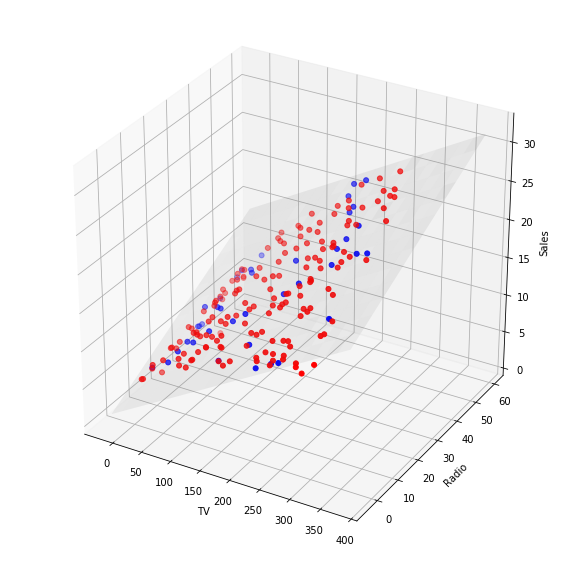

In [151]:
model2 = LinearRegression()
model2.fit(X_train.iloc[:,[0,1]], y_train)

X_grid,Y_grid = np.meshgrid(np.arange(-20, 400, 20), np.arange(-5, 65, 5))
Z = model2.coef_[0]*X_grid + model2.coef_[1]*Y_grid + model2.intercept_
plot3d = plt.figure(figsize=(10,10))
ax = plot3d.gca(projection='3d')

ax.plot_surface(X_grid,Y_grid, Z, alpha=0.1, color = 'grey')
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], y_train, c='r', s=25)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], y_test, c='b', s=25)

plt.xlabel('TV')
plt.ylabel('Radio')
ax.set_zlabel('Sales')

It seems like there's an interaction between TV and radio for high values of TV and low values of radio which is causing some failed predictions.

In [155]:
X_train2 = X_train.copy()
X_train2['TVRadio'] = np.multiply(X_train['TV'],X_train['radio'])
X_test2 = X_test.copy()
X_test2['TVRadio'] = np.multiply(X_test['TV'],X_test['radio'])

In [163]:
model3 = LinearRegression()
model3.fit(X_train2.iloc[:,[0,1,3]], y_train)
predictions2 = model3.predict(X_test2.iloc[:,[0,1,3]])
print("R^2: ", np.round(model3.score(X_test2.iloc[:,[0,1,3]],y_test), 3))

R^2:  0.974


The R^2 has increased to **0.974** from **0.899** in the basic linear model without the interaction term. This also outperforms the k-nearest neighbors non-parametric regression.

Text(0.5,0,'Sales')

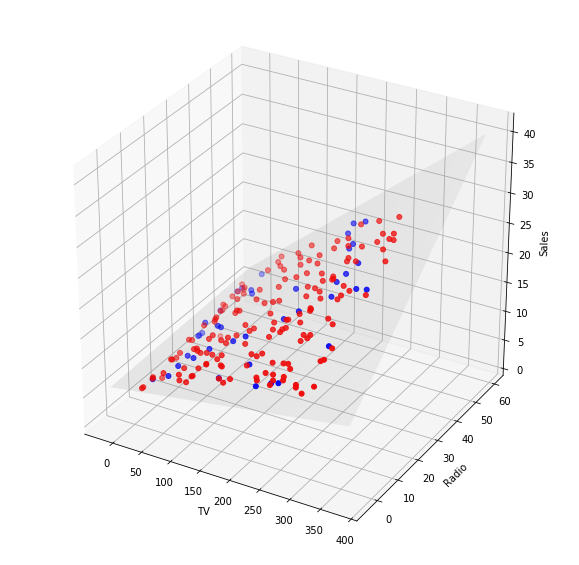

In [159]:
X_grid,Y_grid = np.meshgrid(np.arange(-20, 400, 20), np.arange(-5, 65, 5))

Z = model3.coef_[0]*X_grid + model3.coef_[1]*Y_grid + model3.coef_[2]*np.multiply(X_grid,Y_grid ) + model3.intercept_
plot3d2 = plt.figure(figsize=(10,10))
ax = plot3d2.gca(projection='3d')

ax.plot_surface(X_grid,Y_grid, Z, alpha=0.1, color = 'grey')
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], y_train, c='r', s=25)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], y_test, c='b', s=25)

plt.xlabel('TV')
plt.ylabel('Radio')
ax.set_zlabel('Sales')

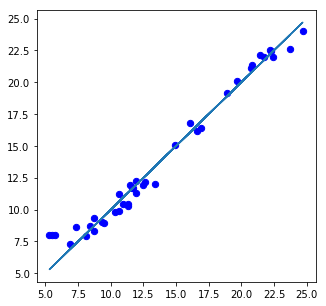

In [165]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test, predictions2, s=40, c='b',)
ax.plot(y_test, y_test)
plt.show()

The fit of the regression seems to have improved a lot after adding in the interaction term.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

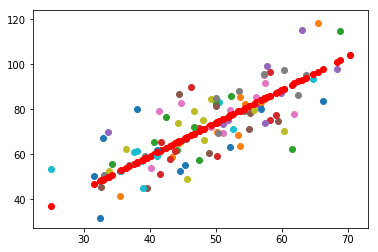

In [191]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, lr = 0.0001):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
   #print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        
run(100)

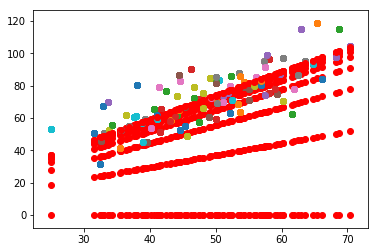

In [192]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
plt.show()


As we can see at a learning rate of alpha = 0.0001 the gradient descent algorithm converges within 9 iterations.

Let's try it with a smaller step of 0.00001 now.

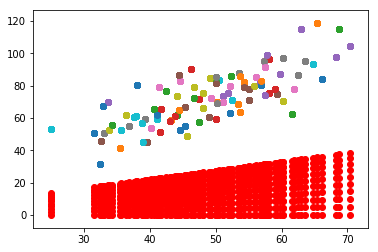

In [193]:
for num in range(0,10):
    run(num, lr = 0.00001)
plt.show()


Just from visual inspection it is clear that the gradient descent algorithm has not converged to the optimal weights even after 9 iterations with a lower learning rate of 0.00001.

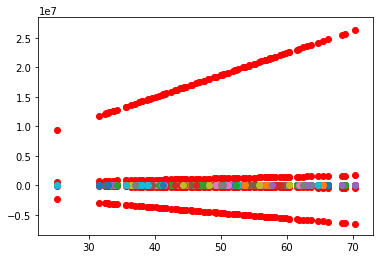

In [194]:
for num in range(0,10):
    run(num, lr = 0.001)
plt.show()

Here we can see that when the learning rate is too large (in this case = 0.001), the algorithm 'overshoots' and does not converge, and will oscillate between being too small and too large.

More advanced algorithms can avoid this overshooting by using an adaptive learning rate such that we can start off with a large value for alpha (e.g. alpha = 1.0) and steadily decrease this every iteration by some decay factor (constant or otherwise).

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [274]:
def errors(num, lr):
    points = genfromtxt("../data/data.csv", delimiter=",")
    b_0, m_0 = 0, 0
    b, m = gradient_descent_runner(points, b_0, m_0, lr, num)
    error =  compute_error_for_line_given_points(b, m, points)
    plt.scatter(num, error)
    plt.title('Learning Rate = {}'.format(lr))

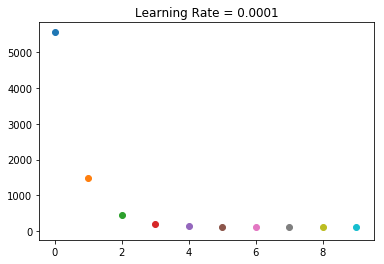

In [291]:
for num in range(10):
    errors(num, 0.0001)

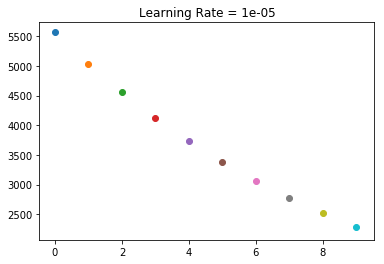

In [290]:
lr = 0.00001
for num in range(10):
    errors(num, lr)
    plt.title('Learning Rate = {}'.format(lr))

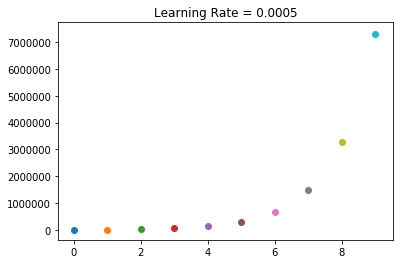

In [293]:
lr = 0.0005
for num in range(10):
    errors(num, 0.0005)
    plt.title('Learning Rate = {}'.format(lr))

As seen in the graphs above, the default learning rate of 0.0001 allows the gradient descent to converge in under 10 iterations.

While the smaller learning rate of 0.00001 also will eventually converge, it will not do so within 10 iterations.

At larger learning rates the gradient descent just oscillates around the global optimum and the error increases with each iteration.